## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv', index_col='p_id')
df.head()

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
p_id,,,,,,,,,
316,2,112,68,22,94,34.1,0.315,26,0
25,11,143,94,33,146,36.6,0.254,51,1
710,2,93,64,32,160,38.0,0.674,23,1
658,1,120,80,48,200,38.9,1.162,41,0
542,3,128,72,25,190,32.4,0.549,27,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 316 to 603
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   no_times_pregnant      614 non-null    int64  
 1   glucose_concentration  614 non-null    int64  
 2   blood_pressure         614 non-null    int64  
 3   skin_fold_thickness    614 non-null    int64  
 4   serum_insulin          614 non-null    int64  
 5   bmi                    614 non-null    float64
 6   diabetes pedigree      614 non-null    float64
 7   age                    614 non-null    int64  
 8   diabetes               614 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 48.0 KB


In [4]:
df.isnull().sum()

no_times_pregnant        0
glucose_concentration    0
blood_pressure           0
skin_fold_thickness      0
serum_insulin            0
bmi                      0
diabetes pedigree        0
age                      0
diabetes                 0
dtype: int64

In [80]:
df_test=pd.read_csv('test.csv')
df_test.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
0,437,12,140,85,33,0,37.4,0.244,41
1,411,6,102,90,39,0,35.7,0.674,28
2,639,7,97,76,32,91,40.9,0.871,32
3,213,7,179,95,31,0,34.2,0.164,60
4,181,6,87,80,0,0,23.2,0.084,32


In [81]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   154 non-null    int64  
 1   no_times_pregnant      154 non-null    int64  
 2   glucose_concentration  154 non-null    int64  
 3   blood_pressure         154 non-null    int64  
 4   skin_fold_thickness    154 non-null    int64  
 5   serum_insulin          154 non-null    int64  
 6   bmi                    154 non-null    float64
 7   diabetes pedigree      154 non-null    float64
 8   age                    154 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 11.0 KB


In [82]:
df_test.isnull().sum()

p_id                     0
no_times_pregnant        0
glucose_concentration    0
blood_pressure           0
skin_fold_thickness      0
serum_insulin            0
bmi                      0
diabetes pedigree        0
age                      0
dtype: int64

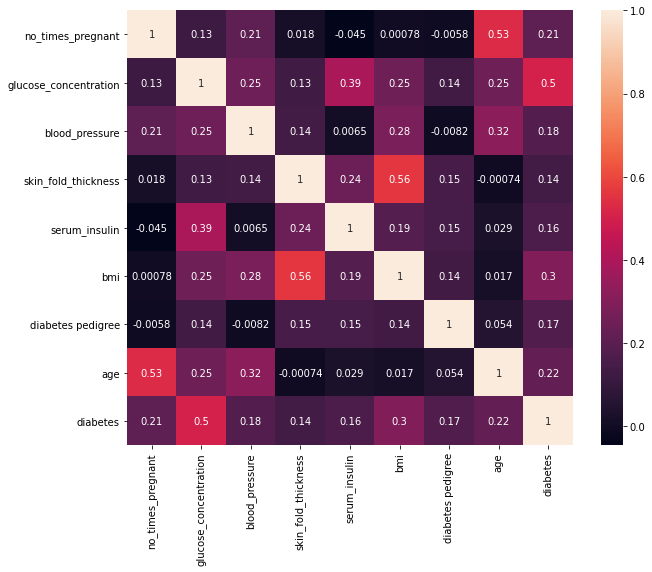

In [83]:
df_corr = df.corr()
corr_feature = df_corr.index
plt.figure(figsize=(10,8))
sns.heatmap(df_corr[corr_feature], annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f646c586e80>,
      dtype=object)

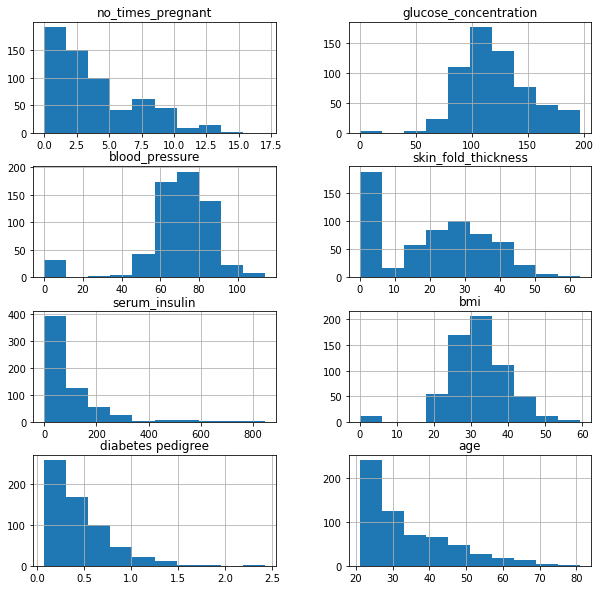

In [9]:
df_hist = df.drop('diabetes',axis=1)
df_hist.hist(layout=(4,2),figsize=(10,10))

In [10]:
df.nunique()

no_times_pregnant         17
glucose_concentration    127
blood_pressure            44
skin_fold_thickness       50
serum_insulin            163
bmi                      237
diabetes pedigree        439
age                       52
diabetes                   2
dtype: int64

In [ ]:
df['no_times_pregnant'].value_counts()

1     100
0      90
2      84
3      65
4      59
6      42
5      41
7      32
8      30
9      25
10     20
11      9
13      8
12      6
15      1
14      1
17      1
Name: no_times_pregnant, dtype: int64

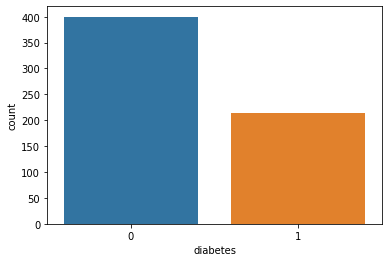

In [12]:
sns.countplot(df['diabetes'])

#### Check whether any zero values are present in the dataframe

In [22]:
print('No of rows with zero in serum_insulin:{0}'.format(len(df.loc[df['serum_insulin']==0])))
print('No of rows with zero in glucose_concentration:{0}'.format(len(df.loc[df['glucose_concentration']==0])))
print('No of rows with zero in blood_pressure:{0}'.format(len(df.loc[df['blood_pressure']==0])))
print('No of rows with zero in skin_fold_thickness:{0}'.format(len(df.loc[df['skin_fold_thickness']==0])))
print('No of rows with zero in bmi:{0}'.format(len(df.loc[df['bmi']==0])))
print('No of rows with zero in diabetes pedigree:{0}'.format(len(df.loc[df['diabetes pedigree']==0])))
print('No of rows with zero in age:{0}'.format(len(df.loc[df['age']==0])))

No of rows with zero in serum_insulin:304
No of rows with zero in glucose_concentration:4
No of rows with zero in blood_pressure:31
No of rows with zero in skin_fold_thickness:187
No of rows with zero in bmi:10
No of rows with zero in diabetes pedigree:0
No of rows with zero in age:0


Fill the zero values with mean

In [58]:
cols = ['serum_insulin','glucose_concentration','blood_pressure','skin_fold_thickness','bmi']

for i in cols:
  df[i]=df[i].mask(df[i]==0,df[i].mean())

In [84]:
print('No of rows with zero in serum_insulin:{0}'.format(len(df_test.loc[df_test['serum_insulin']==0])))
print('No of rows with zero in glucose_concentration:{0}'.format(len(df_test.loc[df_test['glucose_concentration']==0])))
print('No of rows with zero in blood_pressure:{0}'.format(len(df_test.loc[df_test['blood_pressure']==0])))
print('No of rows with zero in skin_fold_thickness:{0}'.format(len(df_test.loc[df_test['skin_fold_thickness']==0])))
print('No of rows with zero in bmi:{0}'.format(len(df_test.loc[df_test['bmi']==0])))
print('No of rows with zero in diabetes pedigree:{0}'.format(len(df_test.loc[df_test['diabetes pedigree']==0])))
print('No of rows with zero in age:{0}'.format(len(df_test.loc[df_test['age']==0])))

No of rows with zero in serum_insulin:70
No of rows with zero in glucose_concentration:1
No of rows with zero in blood_pressure:4
No of rows with zero in skin_fold_thickness:40
No of rows with zero in bmi:1
No of rows with zero in diabetes pedigree:0
No of rows with zero in age:0


In [85]:
for i in cols:
  df_test[i]=df_test[i].mask(df_test[i]==0,df_test[i].mean())

## Import models

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [63]:
X = df.drop('diabetes',axis=1)
y = df['diabetes']

Selecting the best model

In [67]:
clf = [KNeighborsClassifier(), RandomForestClassifier(,), XGBClassifier()]

def score_calc():
  for i in range (len(clf)):
    score = cross_val_score(clf[i],X,y,cv=10)
    print('Score of model', i,'is ',np.mean(score)*100)
score_calc()

Score of model 0 is  73.76520359598096
Score of model 1 is  77.20518244315177
Score of model 2 is  76.05764145954521


## Hyperparameter tuning

In the above we got high accuracy in RandomForest, so we are doing hyperparameter tuning for that model

In [68]:
param = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [69]:
est = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=param,scoring='accuracy',cv=10)

In [71]:
model = est.fit(X,y)
model.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
classifier = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
score = cross_val_score(classifier, X, y,cv=10)
score.mean()

0.7785034373347435

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

In [76]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#### Check the accuracy and confusion matrix

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [78]:
acc_score = accuracy_score(y_pred,y_test)
cm = confusion_matrix(y_pred, y_test)
print(cm)
print(acc_score)

[[131  17]
 [ 13  42]]
0.8522167487684729


In [86]:
prediction = df_test.drop('p_id',axis=1)
submission = classifier.predict(prediction)
submission

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [102]:
df_test['diabetes'] = submission
sub = df_test[['p_id','diabetes']]
sub.head()

,p_id,diabetes
0,437,1
1,411,0
2,639,1
3,213,1
4,181,0


In [103]:
sub.to_csv('Submission.csv',index=False)